# Township of Langley, Land and Parcel: data analysis

Building a regression model to predict the *current* price of properties, based on a consolidated list.

# PART 5
#### More info here:
https://data-tol.opendata.arcgis.com/

In [7]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Import data

In [8]:
dfland = pd.read_csv('land and parcel information\land.csv', index_col=0,
                     dtype={'House': np.object, 'AUC': np.object,
                            'PickUpDay':np.int8, 'LotSize_sq_ft':np.float64},
                     low_memory=False)

In [9]:
dfland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 20995
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ParcelKey                        20996 non-null  int64  
 1   Section                          20996 non-null  object 
 2   ALR                              20996 non-null  object 
 3   Board_of_Variance                20996 non-null  object 
 4   Burning                          20996 non-null  object 
 5   Development_Permit_Area          20996 non-null  object 
 6   Heritage                         20996 non-null  object 
 7   Heritage_Conserve_Area           20996 non-null  object 
 8   Recycling_StartYear              20996 non-null  object 
 9   Recycling_Units_BlueBox          20996 non-null  int64  
 10  Recycling_Units_Toter            20996 non-null  int64  
 11  Secondary_Suite_Details          20996 non-null  object 
 12  Secondary_Suite_To

In [10]:
# Just use the first THREE characters of the Postal Code

dfland['Postal_Code'] = dfland['Postal_Code'].str[:3]
dfland['Postal_Code'].value_counts()

V1M    6429
V3A    4828
V4W    3591
V2Y    3086
V2Z    3036
VIM      12
V0X      12
V1A       2
Name: Postal_Code, dtype: int64

In [11]:
# Drop the following fields:
# ParcelKey, Section
# Neighbourhood
# SHAPE_Length, SHAPE_Area
# Latitude, Longitude

# ... and see if the 'LotSize_sq_ft' field improves the model

dfland.drop(['ParcelKey', 'Section', 'Neighbourhood', 
             'SHAPE_Length', 'SHAPE_Area', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [12]:
dfland.tail()

,ALR,Board_of_Variance,Burning,Development_Permit_Area,Heritage,Heritage_Conserve_Area,Recycling_StartYear,Recycling_Units_BlueBox,Recycling_Units_Toter,Secondary_Suite_Details,Secondary_Suite_ToL_Services,Sewer_StartYear,Sewer_Units,Toters_on_Site,Trees_of_Interest,Water_StartYear,Water_Units,PickUpDay,Residential_Solid_WasteService,Street,Postal_Code,Community,Legal_Type,Zoning,LotSize_sq_ft,Total_Gross_Property_Assessment
20991,NOT IN ALR,N,ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,4000,1,1,Garbage_Green_Recycling,197 ST,V2Y,Willoughby,LAND,SR-2,111078.0,1840000.0
20992,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,0,1,Garbage_Green_Recycling,200 ST,V2Y,Willoughby,LAND,SR-2,123274.8,9179000.0
20993,NOT IN ALR,N,NOT ALLOWED,N,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,QUEEN ST,V1M,Fort Langley,LAND,R-1E,8712.0,1277000.0
20994,NOT IN ALR,N,NOT ALLOWED,N,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,QUEEN ST,V1M,Fort Langley,LAND,R-1E,8712.0,1652000.0
20995,NOT IN ALR,N,NOT ALLOWED,N,HI,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,MARY AVE,V1M,Fort Langley,LAND,R-1E,8712.0,1145000.0


In [13]:
# random_state (any number) is used to ensure reproducibility of the sample
data = dfland.sample(frac=0.9, random_state=786)
data_unseen = dfland.drop(data.index)

In [14]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (18896, 26)
Unseen Data For Predictions: (2100, 26)


In [15]:
from pycaret.regression import *

In [16]:
pycaret.__version__

'2.2.0'

In [17]:
exp_reg102 = setup(data=data, target='Total_Gross_Property_Assessment', session_id=123,
                   normalize=True, transformation=True, transform_target=True,
                   combine_rare_levels=True, rare_level_threshold=0.05,
                   remove_outliers=True, outliers_threshold=0.05,
                   remove_multicollinearity=True, multicollinearity_threshold=0.9,
                   silent=True
                  )

,Description,Value
0,session_id,123
1,Target,Total_Gross_Property_Assessment
2,Original Data,"(18896, 26)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,21
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12567, 384)"


In [18]:
get_config('X').dtypes

Sewer_StartYear    float32
Water_StartYear    float32
PickUpDay             int8
LotSize_sq_ft      float32
ALR_NOT IN ALR     float32
                    ...   
Zoning_RM-3A       float32
Zoning_RM-4        float32
Zoning_SR-1        float32
Zoning_SR-2        float32
Zoning_SR-3        float32
Length: 384, dtype: object

In [19]:
get_config('X').head()

,Sewer_StartYear,Water_StartYear,PickUpDay,LotSize_sq_ft,ALR_NOT IN ALR,Board_of_Variance_N,Board_of_Variance_R,Burning_ALLOWED,Development_Permit_Area_N,Heritage_N,...,Zoning_R-2,Zoning_R-CL,Zoning_RM-1,Zoning_RM-2,Zoning_RM-3,Zoning_RM-3A,Zoning_RM-4,Zoning_SR-1,Zoning_SR-2,Zoning_SR-3
0,-0.370744,-0.373333,3,0.170080,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.678108,2.260754,3,0.240394,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.370744,-0.373333,3,-0.400534,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.370744,-0.373333,1,1.758891,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.370744,-0.373333,2,1.691901,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
catboost = compare_models(include=['catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,140077.9849,253081265706.6442,494360.3719,0.7217,0.3649,117.3715,8.8810


In [21]:
catboost

PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=<catboost.core.CatBoostRegressor object at 0x0000020D812DDB80>,
                                task_type='CPU', verbose=False)

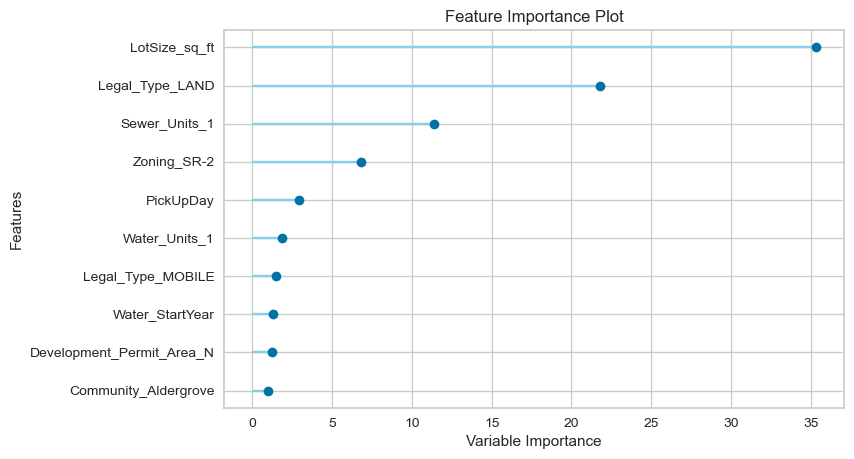

In [22]:
plot_model(catboost, plot='feature')

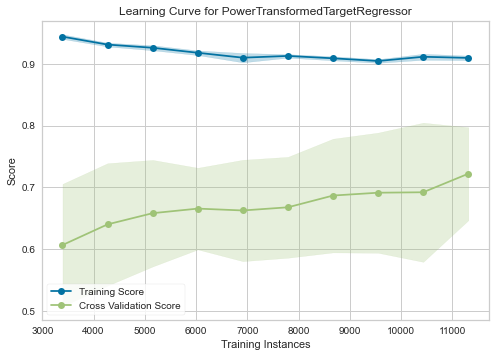

In [23]:
plot_model(catboost, plot='learning')

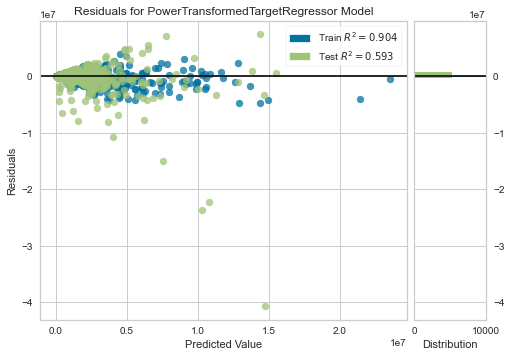

In [24]:
plot_model(catboost, plot='residuals')

In [25]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,138167.2144,220853499709.3067,469950.5290,0.7967,0.5435,386.4277
1,160098.5684,335987948671.5179,579644.6745,0.6467,0.2769,0.1926
2,146534.8656,345225462560.5886,587558.9014,0.5811,0.3439,1.0199
3,133461.1949,230910978118.8132,480531.9741,0.6998,0.2575,0.1795
4,143753.1303,163702381487.4899,404601.5095,0.7792,0.3038,0.3006
5,101911.5951,76934964623.2107,277371.5281,0.8556,0.1761,0.1021
6,136528.8685,236590620096.2056,486405.8183,0.7638,0.3885,105.1643
7,147013.3861,247443237387.1570,497436.6667,0.7047,0.6044,451.0858
8,144969.3834,349424452700.6466,591121.3519,0.6892,0.4842,229.0831
9,148341.6419,323739111711.5057,568980.7657,0.7003,0.2701,0.1588


In [26]:
import scipy.stats

params = {'iterations': [250,500],
          'learning_rate': scipy.stats.uniform(0.01, 0.3), 
          'l2_leaf_reg': scipy.stats.reciprocal(a=1e-2, b=1e1),
          'max_depth': scipy.stats.randint(3, 10),
          'one_hot_max_size': [30],
          'border_count': [10,20,50,100,200]
         }

In [27]:
catboost_tuned = tune_model(catboost, custom_grid=params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,135088.5376,195789105634.5428,442480.6274,0.8198,0.5377,397.7859
1,157407.1878,333836970294.6790,577786.2670,0.6490,0.2750,0.1906
2,145347.1345,307477270299.3166,554506.3303,0.6269,0.3447,0.8859
3,128231.7068,172910052000.4051,415824.5447,0.7752,0.2514,0.1644
4,141901.1099,166241267010.9022,407726.9515,0.7758,0.3055,0.3164
5,101008.4306,85905350164.0997,293096.1449,0.8388,0.1794,0.1006
6,143893.9819,343961926601.3297,586482.6737,0.6566,0.3934,102.2661
7,145489.1815,255649519180.8722,505617.9577,0.6949,0.6029,452.9481
8,151794.7883,399939078098.6498,632407.3672,0.6443,0.4868,229.7753
9,149273.2370,328884228748.2895,573484.2881,0.6956,0.2740,0.1578


In [28]:
plot_model(catboost_tuned, plot='parameter')

,Parameters
loss_function,RMSE
iterations,250
learning_rate,0.24310133166693412
l2_leaf_reg,1.9860393569788302
border_count,200
verbose,False
one_hot_max_size,30
task_type,CPU
max_depth,6
random_state,123


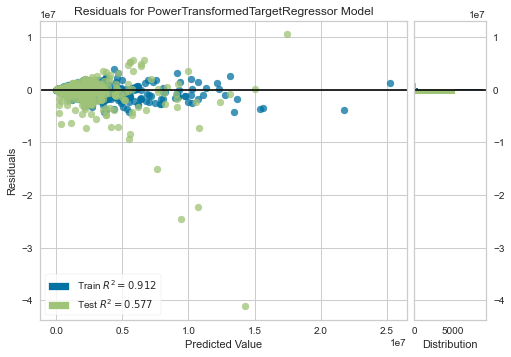

In [29]:
plot_model(catboost_tuned, plot='residuals')

In [30]:
predict_model(catboost_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,162819.5340,807578523555.0955,898653.7284,0.5773,0.3752,106.0110


,Sewer_StartYear,Water_StartYear,PickUpDay,LotSize_sq_ft,ALR_NOT IN ALR,Board_of_Variance_N,Board_of_Variance_R,Burning_ALLOWED,Development_Permit_Area_N,Heritage_N,...,Zoning_RM-1,Zoning_RM-2,Zoning_RM-3,Zoning_RM-3A,Zoning_RM-4,Zoning_SR-1,Zoning_SR-2,Zoning_SR-3,Total_Gross_Property_Assessment,Label
0,-0.370744,-0.373333,3,-0.403657,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,763000.0,7.848980e+05
1,-0.370744,-0.373333,1,1.849277,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2370000.0,2.456664e+06
2,-0.370744,-0.373333,4,-1.264764,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,392000.0,4.947446e+05
3,-0.370744,-0.373333,4,0.240394,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,955000.0,9.288130e+05
4,-0.370744,-0.373333,4,2.099302,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1552000.0,2.415850e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,2.787635,-0.373333,1,1.883832,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1441000.0,1.114173e+06
5665,-0.370744,-0.373333,2,-0.807912,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476900.0,4.444477e+05
5666,-0.370744,-0.373333,4,0.115041,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1072000.0,1.019896e+06
5667,2.788848,3.002603,1,-0.560856,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,957000.0,9.991406e+05


In [31]:
catboost_final = finalize_model(catboost_tuned)

In [32]:
unseen_predictions = predict_model(catboost_final, data=data_unseen)

In [33]:
unseen_predictions.head().style \
                        .format({'Total_Gross_Property_Assessment': "{:,.0f}", 'Label': '{:,.0f}'})

,ALR,Board_of_Variance,Burning,Development_Permit_Area,Heritage,Heritage_Conserve_Area,Recycling_StartYear,Recycling_Units_BlueBox,Recycling_Units_Toter,Secondary_Suite_Details,Secondary_Suite_ToL_Services,Sewer_StartYear,Sewer_Units,Toters_on_Site,Trees_of_Interest,Water_StartYear,Water_Units,PickUpDay,Residential_Solid_WasteService,Street,Postal_Code,Community,Legal_Type,Zoning,LotSize_sq_ft,Total_Gross_Property_Assessment,Label
0,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,WILLOUGHBY WAY,V2Y,Willoughby,STRATA,RM-2,0.000000,"508,000","441,146"
1,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,WILLOUGHBY WAY,V2Y,Willoughby,STRATA,RM-2,0.000000,"529,000","441,146"
2,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,WILLOUGHBY WAY,V2Y,Willoughby,STRATA,RM-2,0.000000,"495,000","441,146"
3,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,64 AVE,V2Y,Willoughby,STRATA,RM-2,0.000000,"422,000","441,146"
4,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,64 AVE,V2Y,Willoughby,STRATA,RM-2,0.000000,"433,000","441,146"


In [34]:
from pycaret.utils import check_metric

check_metric(unseen_predictions['Total_Gross_Property_Assessment'], unseen_predictions.Label, 'R2')

0.72